<a href="https://colab.research.google.com/github/Aylinme/e-commerce-data-analysis/blob/main/CapstoneProject_Aylin_Mergan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Sample - Superstore_Orders.csv')
data.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,11/8/2019,CA-2019-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00%,$42,2,$262,$392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,11/8/2019,CA-2019-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,Shipped On Time,Kentucky,Chairs,3,3,0.00%,$220,3,$732,"$1,096"
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,6/12/2019,CA-2019-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,Shipped Late,California,Labels,4,3,0.00%,$7,2,$15,$22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,10/11/2018,US-2018-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,Shipped Late,Florida,Tables,7,6,45.00%,($383),5,$958,"$1,434"
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,10/11/2018,US-2018-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,Shipped Late,Florida,Storage,7,6,20.00%,$3,2,$22,$33


In [ ]:
# Number of rows and columns
data.shape

(9994, 25)

In [ ]:
# Name of columns in the dataset
data.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

Data Transformation and Cleaning

In [ ]:
# All columns have been renamed.
data.rename(columns = {'Row ID':'Row_ID', 'Order ID':'Order_ID','Order Date':'Order_Date', 'Ship Date':'Ship_Date', 'Ship Mode':'Ship_Mode', 
                       'Customer ID':'Customer_ID','Customer Name':'Customer_Name', 'Postal Code':'Postal_Code','Product ID':'Product_ID',
                       'Product Name':'Product_Name', 'Shipping Cost':'Shipping_Cost', 'Order Priority':'Order_Priority', 
                       'Country/Region':'Country','Sales Forecast':'Sales_Forecast'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country                 9994 non-null   object 
 3   Customer_ID             9994 non-null   object 
 4   Customer_Name           9994 non-null   object 
 5   Order_Date              9994 non-null   object 
 6   Order_ID                9994 non-null   object 
 7   Postal_Code             9983 non-null   float64
 8   Product_ID              9994 non-null   object 
 9   Product_Name            9994 non-null   object 
 10  Region                  9994 non-null   object 
 11  Row_ID                  9994 non-null   int64  
 12  Segment                 9994 non-null   object 
 13  Ship_Date               9994 non-null   object 
 14  Ship_Mode               9994 non-null   

In [ ]:
data.nunique()

Category                     3
City                       531
Country                      1
Customer_ID                793
Customer_Name              793
Order_Date                1236
Order_ID                  5009
Postal_Code                630
Product_ID                1862
Product_Name              1849
Region                       4
Row_ID                    9994
Segment                      3
Ship_Date                 1334
Ship_Mode                    4
Ship Status                  3
State                       49
Sub-Category                17
Days to Ship Actual          9
Days to Ship Scheduled       4
Discount                    12
Profit                     755
Quantity                    14
Sales                     1148
Sales_Forecast            1406
dtype: int64

In [ ]:
#checking for null values
data.isnull().sum()

Category                   0
City                       0
Country                    0
Customer_ID                0
Customer_Name              0
Order_Date                 0
Order_ID                   0
Postal_Code               11
Product_ID                 0
Product_Name               0
Region                     0
Row_ID                     0
Segment                    0
Ship_Date                  0
Ship_Mode                  0
Ship Status                0
State                      0
Sub-Category               0
Days to Ship Actual        0
Days to Ship Scheduled     0
Discount                   0
Profit                     0
Quantity                   0
Sales                      0
Sales_Forecast             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Dropping Postal Code and Row ID
data = data.drop(['Postal_Code','Row_ID'], axis = 1)

In [ ]:
^# Changing the type of datas
data['Sales'] = data['Sales'].apply(lambda x: x.replace('$','').replace(',','')).astype('float64')
data['Sales_Forecast'] = data['Sales_Forecast'].apply(lambda x: x.replace('$','').replace(',','')).astype('float64')
data['Discount'] = data['Discount'].apply(lambda x: x.strip('%')).astype('float64')
data['Profit'] = data['Profit'].apply(lambda x: x.replace('(','-').replace(')', '').replace('$','').replace(',','')).astype('float64')

In [ ]:
data['Price'] = round(data['Sales']/data['Quantity'],3)

In [ ]:
#Converting the 'Order_Date' column to datetime format
data['Order_Date']= pd.to_datetime(data['Order_Date'])

# Check the format of 'Date' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country                 9994 non-null   object        
 3   Customer_ID             9994 non-null   object        
 4   Customer_Name           9994 non-null   object        
 5   Order_Date              9994 non-null   datetime64[ns]
 6   Order_ID                9994 non-null   object        
 7   Product_ID              9994 non-null   object        
 8   Product_Name            9994 non-null   object        
 9   Region                  9994 non-null   object        
 10  Segment                 9994 non-null   object        
 11  Ship_Date               9994 non-null   object        
 12  Ship_Mode               9994 non-null   object  

In [ ]:
#Extracting the order month from Order_Date column
data['Year'] = data['Order_Date'].dt.strftime('%Y')

In [ ]:
#Extracting the order month from Order_Date column
data['Month_Year'] = data['Order_Date'].dt.strftime('%m/%Y')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Category,City,Country,Customer_ID,Customer_Name,Order_Date,Order_ID,Product_ID,Product_Name,Region,Segment,Ship_Date,Ship_Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales_Forecast,Price,Year,Month_Year
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2019-11-08,CA-2019-152156,FUR-BO-10001798,Bush Somerset Collection Bookcase,South,Consumer,11/11/2019,Second Class,Shipped On Time,Kentucky,Bookcases,3,3,0.0,42.0,2,262.0,392.0,131.0,2019,11/2019
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2019-11-08,CA-2019-152156,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,Consumer,11/11/2019,Second Class,Shipped On Time,Kentucky,Chairs,3,3,0.0,220.0,3,732.0,1096.0,244.0,2019,11/2019
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2019-06-12,CA-2019-138688,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,West,Corporate,6/16/2019,Second Class,Shipped Late,California,Labels,4,3,0.0,7.0,2,15.0,22.0,7.5,2019,06/2019
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2018-10-11,US-2018-108966,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,South,Consumer,10/18/2018,Standard Class,Shipped Late,Florida,Tables,7,6,45.0,-383.0,5,958.0,1434.0,191.6,2018,10/2018
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2018-10-11,US-2018-108966,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,South,Consumer,10/18/2018,Standard Class,Shipped Late,Florida,Storage,7,6,20.0,3.0,2,22.0,33.0,11.0,2018,10/2018


In [ ]:
data.pivot_table(data,index=["Region"])

,Days to Ship Actual,Days to Ship Scheduled,Discount,Price,Profit,Quantity,Sales,Sales_Forecast
Region,,,,,,,,
Central,4.057684,4.445975,24.035299,56.796076,17.098149,3.779595,215.779595,323.141627
East,3.908708,4.254916,14.536517,64.095809,32.135183,3.728230,238.354635,356.939958
South,3.959259,4.361111,14.725309,61.701327,28.840123,3.832716,241.820988,362.126543
West,3.931939,4.267874,10.933500,60.709258,33.838901,3.829535,226.510771,339.217921


In [ ]:
data.describe()

,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales_Forecast,Price
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.958975,4.320692,15.620272,28.651891,3.789574,229.873324,344.244847,60.925561
std,1.748902,2.176059,20.645197,234.255712,2.225110,623.248946,933.364519,142.930421
min,0.000000,0.000000,0.000000,-6600.000000,1.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,0.000000,2.000000,2.000000,17.000000,26.000000,5.500000
50%,4.000000,6.000000,20.000000,9.000000,3.000000,54.500000,82.000000,16.250000
75%,5.000000,6.000000,20.000000,29.000000,5.000000,210.000000,314.000000,64.000000
max,8.000000,6.000000,80.000000,8400.000000,14.000000,22638.000000,33903.000000,3773.000000


Data Visualization

In [ ]:
#Values in category and subcategory
print(data['Sub-Category'].unique())
print(data['Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Furniture' 'Office Supplies' 'Technology']


In [ ]:
data.groupby(['Category','Sub-Category']).sum()

Days to Ship Actual  Days to Ship Scheduled  \
Category        Sub-Category                                                
Furniture       Bookcases                     870                     937   
                Chairs                       2407                    2641   
                Furnishings                  3791                    4148   
                Tables                       1242                    1370   
Office Supplies Appliances                   1859                    2041   
                Art                          3227                    3535   
                Binders                      6127                    6710   
                Envelopes                    1020                    1121   
                Fasteners                     863                     957   
                Labels                       1457                    1572   
                Paper                        5329                    5782   
                Storage                      3363                    3656   
                Supplies                      763                     820   
Technology      Accessories                  3012                    3278   
                Copiers                       246                     273   
                Machines                      431                     473   
                Phones                       3559                    3867   

                              Discount   Profit  Quantity     Sales  \
Category        Sub-Category                                          
Furniture       Bookcases       4814.0  -3479.0       868  114879.0   
                Chairs         10500.0  26586.0      2356  328454.0   
                Furnishings    13240.0  13070.0      3563   91705.0   
                Tables          8335.0 -17733.0      1241  206968.0   
Office Supplies Appliances      7760.0  18132.0      1729  107538.0   
                Art             5960.0   6530.0      3000   27137.0   
                Binders        56700.0  30200.0      5974  203428.0   
                Envelopes       2040.0   6956.0       906   16477.0   
                Fasteners       1780.0    952.0       914    3024.0   
                Labels          2500.0   5558.0      1400   12507.0   
                Paper          10260.0  34053.0      5178   78475.0   
                Storage         6320.0  21280.0      3158  223862.0   
                Supplies        1460.0  -1187.0       647   46679.0   
Technology      Accessories     6080.0  41932.0      2976  167401.0   
                Copiers         1100.0  55618.0       234  149530.0   
                Machines        3520.0   3387.0       440  189243.0   
                Phones         13740.0  44492.0      3289  330047.0   

                              Sales_Forecast      Price  
Category        Sub-Category                             
Furniture       Bookcases           172047.0  29893.169  
                Chairs              491891.0  85649.542  
                Furnishings         137329.0  24505.921  
                Tables              309952.0  52666.435  
Office Supplies Appliances          161046.0  28248.274  
                Art                  40627.0   7029.244  
                Binders             304639.0  55858.616  
                Envelopes            24683.0   4793.933  
                Fasteners             4535.0    713.826  
                Labels               18713.0   3037.216  
                Paper               117535.0  21335.626  
                Storage             335240.0  59608.128  
                Supplies             69903.0  13169.718  
Technology      Accessories         250691.0  42905.658  
                Copiers             223937.0  40870.000  
                Machines            283402.0  48686.764  
                Phones              494213.0  89917.982

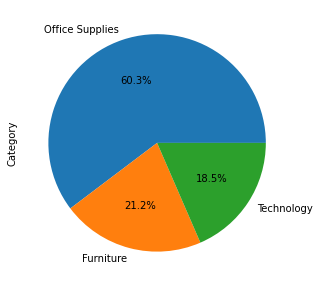

In [ ]:
data['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(10,5))

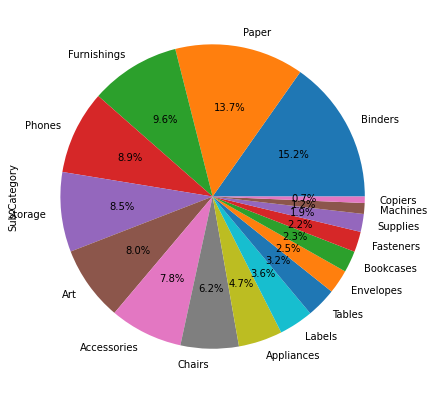

In [ ]:
data['Sub-Category'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(15,7))

In [ ]:
# What are the top selling products?

data0= data.groupby(['Product_Name','Sub-Category']).agg({'Quantity':'sum'}).sort_values('Quantity',ascending=False)[:10]
data0

,,Quantity
Product_Name,Sub-Category,
Staples,Fasteners,215
Staple envelope,Envelopes,170
Easy-staple paper,Paper,150
Staples in misc. colors,Art,86
KI Adjustable-Height Table,Tables,74
Storex Dura Pro Binders,Binders,71
Avery Non-Stick Binders,Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,Binders,67
"Situations Contoured Folding Chairs, 4/Set",Chairs,64


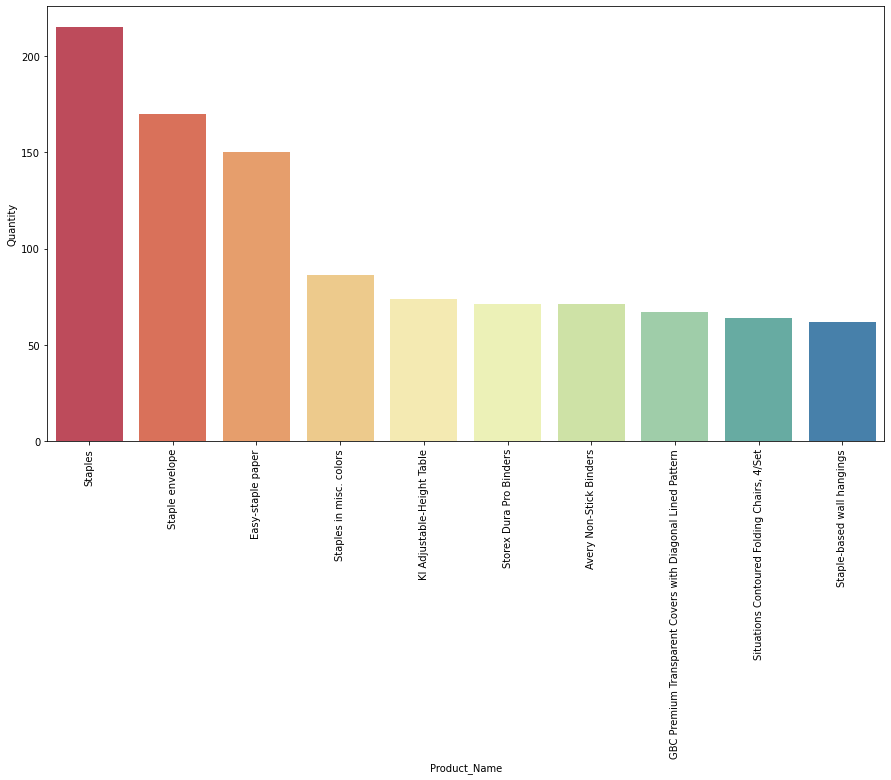

In [ ]:
sns.barplot(x='Product_Name',y='Quantity',palette="Spectral", data=data0.reset_index())
plt.xticks(rotation = 'vertical')
plt.gcf().set_size_inches(15, 8)

In [ ]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,742006.0,18444.0,8028
Office Supplies,719127.0,122474.0,22906
Technology,836221.0,145429.0,6939


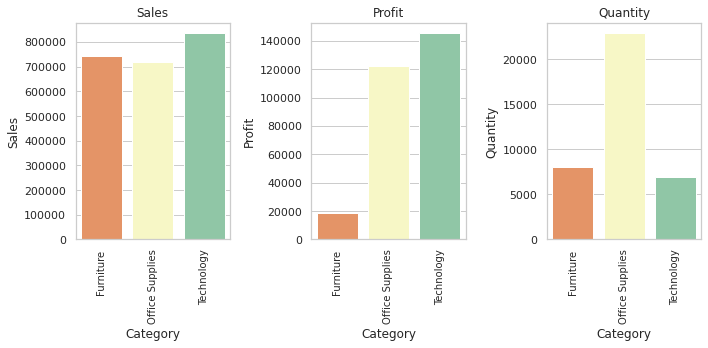

In [ ]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, 
                   ax=axis[0], palette="Spectral")
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, 
                   ax=axis[1], palette="Spectral")
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity,
                   ax=axis[2], palette="Spectral")

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 10)

# Set spacing between subplots
figure.tight_layout()

Furniture, Office Equipment and Technological products sell in similar amounts.
Technological products that sell the most and bring profit. Since these products are usually one-time purchases that can be used for a long time, they are only sold in minimal quantities.
Although Furniture makes similar sales to Technology, it is the least profitable and the quantity sold is also minimal.
Office Supplies are the best selling items in quantity as it is a relatively inexpensive product.

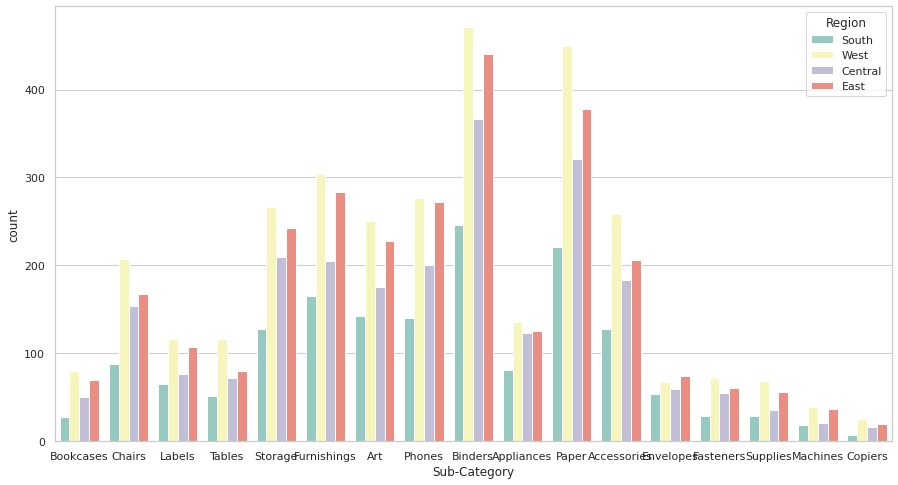

In [ ]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data, palette="Set3")
plt.show()

Text(0.5, 1.0, 'Region VS Sales')

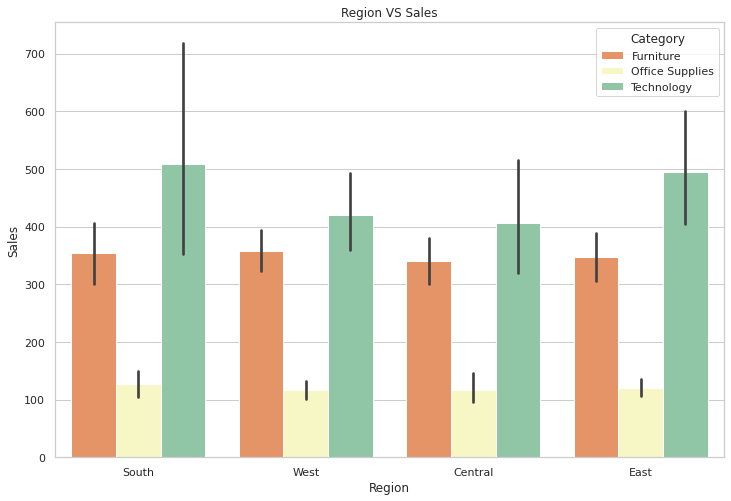

In [ ]:
# Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=data, palette="Spectral")
plt.title("Region VS Sales")

The sales of 'Office Supplies' are extremely low in every region. Furniture and technology are much ahead of the curve.

Text(0.5, 1.0, 'Region VS Profit')

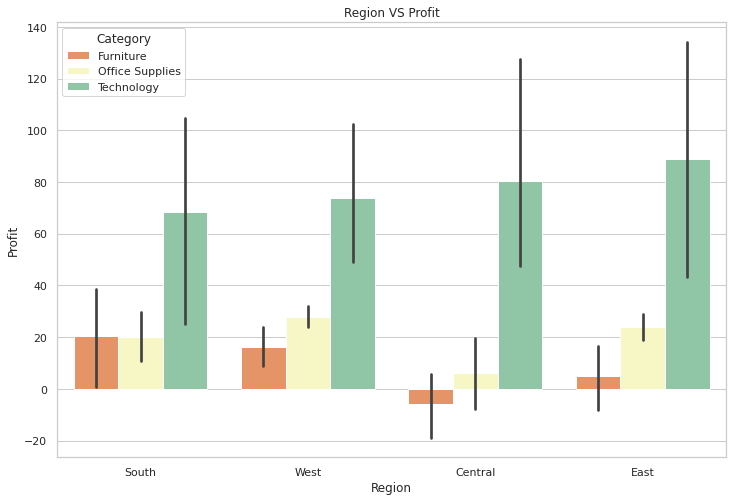

In [ ]:
# Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=data, palette="Spectral")
plt.title("Region VS Profit")

In every region, 'technology' creates the most profit. And, with the exception of the South, 'Furniture' is underperforming in all regions. Most significantly, 'Furniture' is losing market share in the Central region. These points should be acknowledged and addressed.

What is the daily sales amount for each country?

In [ ]:
data2 = pd.pivot_table(data,values= "Sales", index= "Order_Date", 
                       columns= "State").head(10)
data2= data2.fillna(0)
data2

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Order_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.000000,0.0,0.0,0.0,625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,0.0,0.0,0.0,0.0
2017-01-11,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-13,0.0,0.0,0.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,257.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data3 = pd.pivot_table(data, values= "Profit", index= "Order_Date", columns= "State").head(10)
data3 =data3.fillna(0)
data3

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Order_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,191.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
2017-01-11,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-13,0.0,0.0,0.0,83.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,65.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


What are the most profitable countries?

In [ ]:
data4= data.sort_values('Profit',ascending=False)[['State','Region','City','Profit']].head(10)
data4

,State,Region,City,Profit
6826,Indiana,Central,Lafayette,8400.0
8153,Washington,West,Seattle,6720.0
4190,Delaware,East,Newark,5040.0
9039,Michigan,Central,Detroit,4946.0
4098,Minnesota,Central,Minneapolis,4630.0
2623,New York,East,New York City,3920.0
509,Georgia,South,Atlanta,3177.0
8488,Virginia,South,Arlington,2800.0
7666,Rhode Island,East,Providence,2592.0
6520,Michigan,Central,Jackson,2504.0


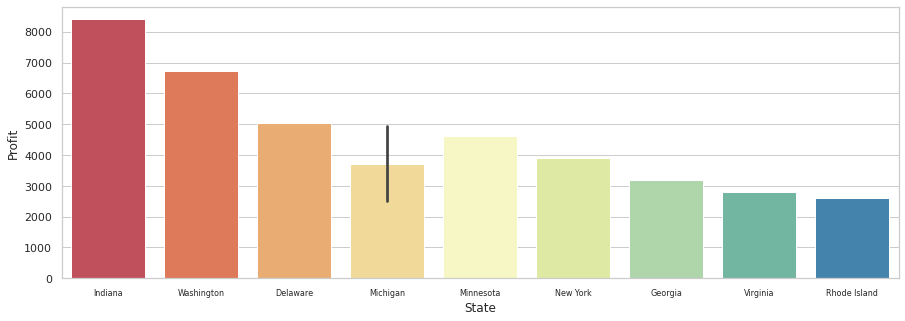

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax=sns.barplot(data4['State'],data4['Profit'],palette="Spectral")
plt.xticks(size=8)
plt.show()

In [ ]:
region_analysis = pd.DataFrame(data.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39719.0
1,East,91521.0
2,South,46721.0
3,West,108386.0


What are the Best Selling and Most Profitable Sub-Category?

In [ ]:
# Group by sub-category
data5 = pd.DataFrame(data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(data5.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330047.0,44492.0
Chairs,328454.0,26586.0
Storage,223862.0,21280.0
Tables,206968.0,-17733.0
Binders,203428.0,30200.0
Machines,189243.0,3387.0
Accessories,167401.0,41932.0
Copiers,149530.0,55618.0
Bookcases,114879.0,-3479.0


In [ ]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(data5.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149530.0,55618.0
Phones,330047.0,44492.0
Accessories,167401.0,41932.0
Paper,78475.0,34053.0
Binders,203428.0,30200.0
Chairs,328454.0,26586.0
Storage,223862.0,21280.0
Appliances,107538.0,18132.0
Furnishings,91705.0,13070.0


In [ ]:
# Split dataset by region
data_central = data[data['Region']=='Central']
data_east = data[data['Region']== 'East']
data_south = data[data['Region'] == 'South']
data_west = data[data['Region'] == 'West']

In [ ]:
# Finding the top 5 most profitable customers by region
profit_central = pd.DataFrame(data_central.groupby('Customer_Name')['Profit'].sum())
best_central = profit_central.sort_values(by=['Profit'],ascending=False).head(5)

profit_east = pd.DataFrame(data_east.groupby('Customer_Name')['Profit'].sum())
best_east = profit_east.sort_values(by=['Profit'],ascending=False).head(5)

profit_south = pd.DataFrame(data_south.groupby('Customer_Name')['Profit'].sum())
best_south = profit_south.sort_values(by=['Profit'],ascending=False).head(5)

profit_west = pd.DataFrame(data_west.groupby('Customer_Name')['Profit'].sum())
best_west = profit_west.sort_values(by=['Profit'],ascending=False).head(5)

frame = {'Central':best_central,'East': best_east, 'South': best_south, 'West': best_west}
data6 = pd.concat(frame)
data6

Profit
        Customer_Name               
Central Tamara Chand          8746.0
        Adrian Barton         5363.0
        Sanjit Chand          4668.0
        Andy Reiter           2602.0
        Harry Marie           1997.0
East    Hunter Lopez          5046.0
        Tom Ashbrook          4600.0
        Daniel Raglin         3051.0
        Bill Shonely          2558.0
        Keith Dawkins         2518.0
South   Christopher Martinez  3197.0
        Sanjit Engle          2825.0
        Katrina Willman       1606.0
        Mark Cousins          1557.0
        Maria Etezadi         1488.0
West    Raymond Buch          6807.0
        Jane Waco             2073.0
        Fred Hopkins          1992.0
        Dennis Pardue         1789.0
        Robert Marley         1598.0

This dataset also shows how much profit we make from which customer.

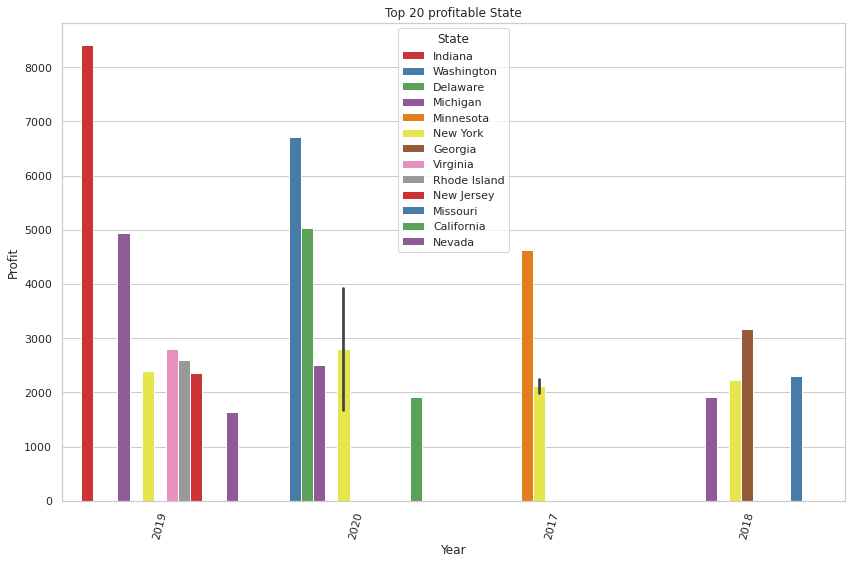

In [ ]:
#Top 20 Customers who benefitted the store
sortedTop20 = data.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Year', y='Profit', hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable State")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

<Figure size 1080x576 with 0 Axes>

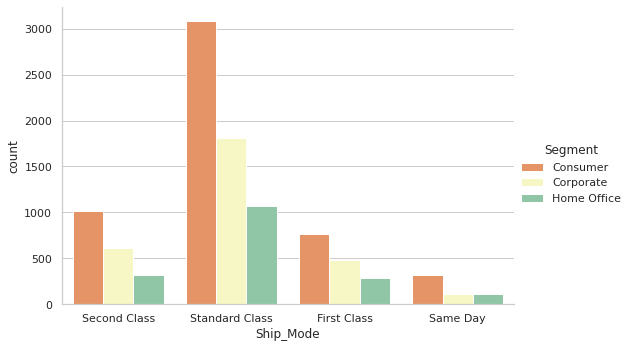

In [ ]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot("Ship_Mode", hue="Segment", data=data, kind="count", aspect=1.5, palette="Spectral")

Standard Class is the preferred shipping method and perhaps the cheapest. Other mods are not popular with customers and can be very costly.

In [ ]:
segment_analysis = pd.DataFrame(data.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134113.0
Corporate,91965.0
Home Office,60269.0


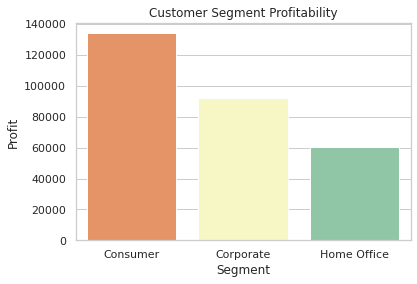

In [ ]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "Spectral")
plt.title("Customer Segment Profitability")
plt.show()

The most profitable consumer segment is followed by the Corporate Segment and Home Office. The Consumer and Enterprise Segment should aim or focus more on customer retention.

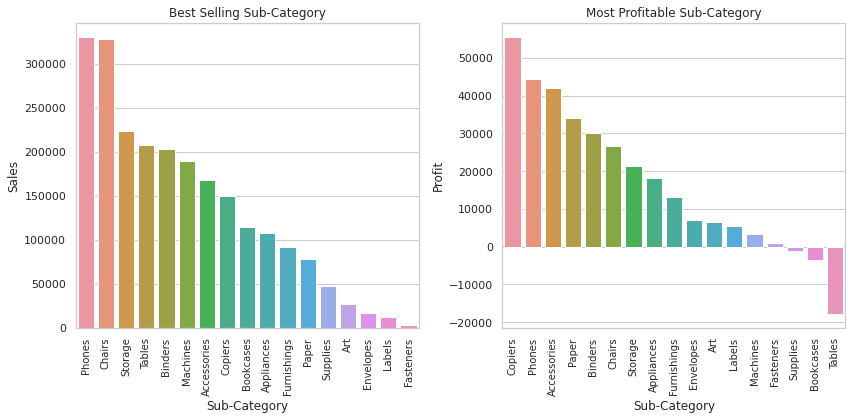

In [ ]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, 
                      y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", 
                        size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, 
                      y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", 
                        size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

What are the most profitable products?

In [ ]:
data1= data.sort_values('Profit', ascending=False)[['Product_Name','Profit']].head(10)
data1

,Product_Name,Profit
6826,Canon imageCLASS 2200 Advanced Copier,8400.0
8153,Canon imageCLASS 2200 Advanced Copier,6720.0
4190,Canon imageCLASS 2200 Advanced Copier,5040.0
9039,GBC Ibimaster 500 Manual ProClick Binding System,4946.0
4098,Ibico EPK-21 Electric Binding System,4630.0
2623,Canon imageCLASS 2200 Advanced Copier,3920.0
509,Fellowes PB500 Electric Punch Plastic Comb Bin...,3177.0
8488,HP Designjet T520 Inkjet Large Format Printer ...,2800.0
7666,Hewlett Packard LaserJet 3310 Copier,2592.0
6520,GBC DocuBind P400 Electric Binding System,2504.0


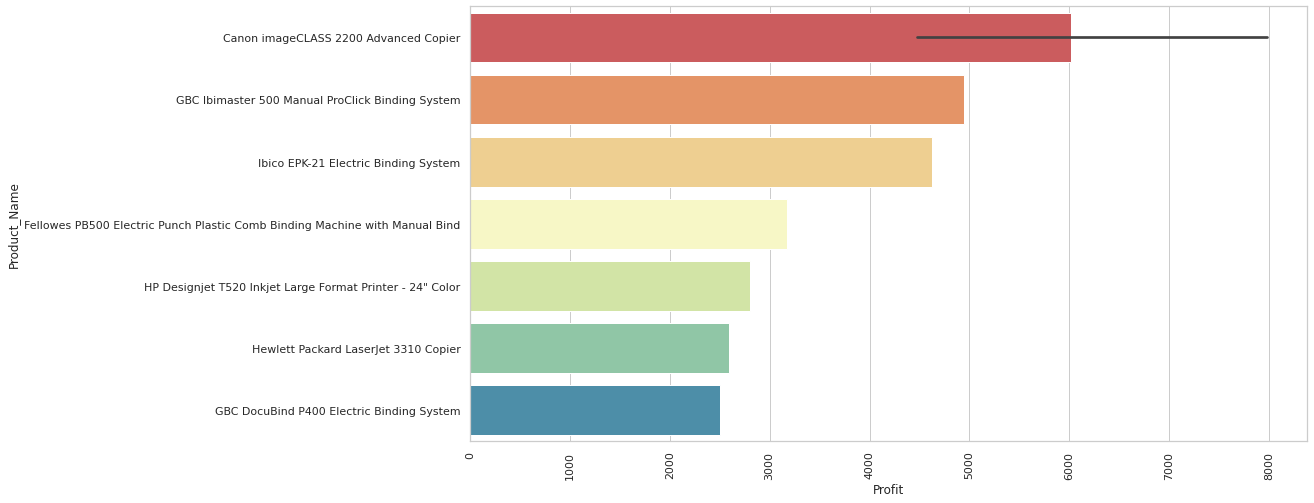

In [ ]:
sns.barplot(y='Product_Name',x='Profit',data=data1.reset_index(),palette="Spectral")
plt.xticks(rotation = 'vertical')
plt.gcf().set_size_inches(15, 8)

Phones and Chairs are the two most popular sub-categories, as shown here.

Copiers generate the most revenue, followed by phones, accessories, papers, and binders. As a result, the company should focus more on selling these products.

Machines, Fasteners, Consumables, Libraries, and Desks, on the other hand, have near-zero profitability and are hurting the company. As a result, the company may consider removing certain items from the product catalog, raising the selling price and profit margin, or negotiating a lower price with the supplier.

In [ ]:
city_sales = pd.DataFrame(data.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256397.0,3417
Los Angeles,175857.0,2879
Seattle,119552.0,1590
San Francisco,112690.0,1935
Philadelphia,109085.0,1981
Houston,64504.0,1466
Chicago,48540.0,1132
San Diego,47521.0,670
Jacksonville,44712.0,429


In [ ]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.0,7
Keller,6.0,2
Layton,5.0,4
San Luis Obispo,4.0,2
Springdale,4.0,2
Ormond Beach,3.0,3
Pensacola,2.0,3
Jupiter,2.0,1
Elyria,2.0,1


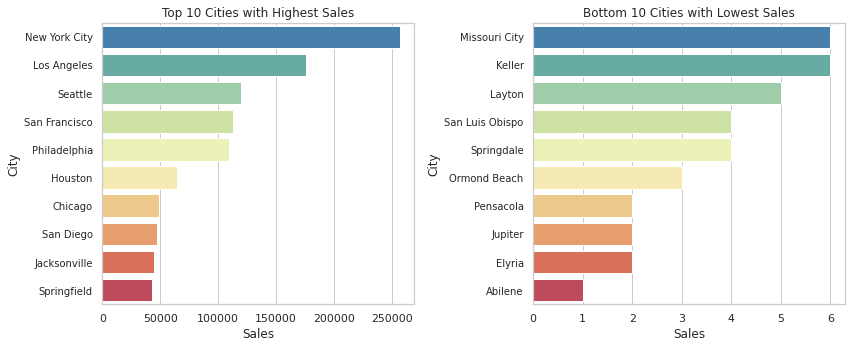

In [ ]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "Spectral_r", ax = axis[0])
top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "Spectral_r", ax=axis[1])
bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

In [ ]:
data["Month_Year"] = data['Order_Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
#grouping the data according to the month and year
df_month_year = data.groupby('Month_Year').sum()['Sales'].reset_index()
df_month_year

,Month_Year,Sales
0,2017-01,14238.0
1,2017-02,4518.0
2,2017-03,55689.0
3,2017-04,28294.0
4,2017-05,23648.0
5,2017-06,34598.0
6,2017-07,33948.0
7,2017-08,27908.0
8,2017-09,81787.0
9,2017-10,31448.0


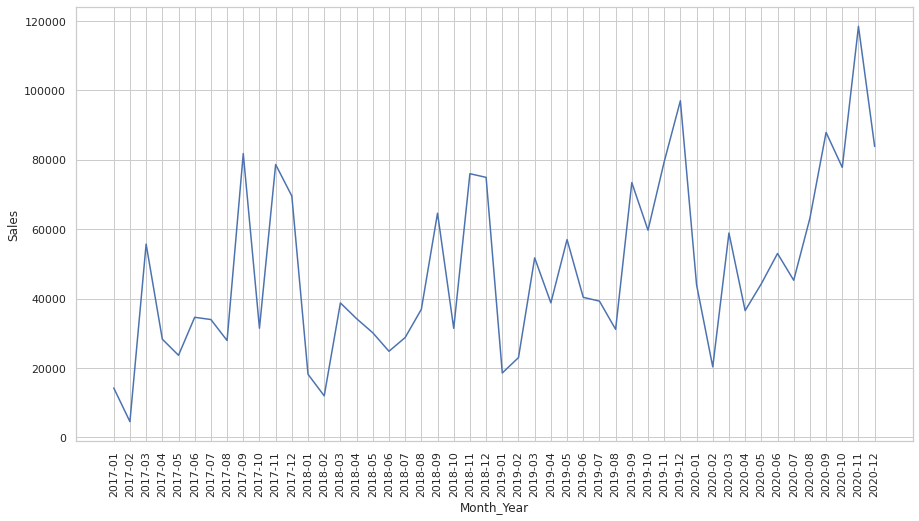

In [ ]:
#visualizing the monthly trend
plt.figure(figsize=(15, 8))
sns.lineplot(df_month_year['Month_Year'], df_month_year['Sales'])
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

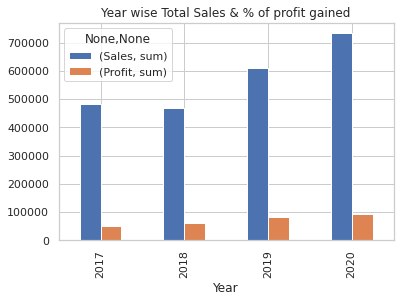

In [ ]:
#Sales per year
data.groupby('Year')['Sales','Profit'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

In general, sales in 2017-2019 seem low at the beginning of the year and high at the end of the year. In 2020, there was a sudden increase in sales across the country due to the in-store closure due to the coronavirus.

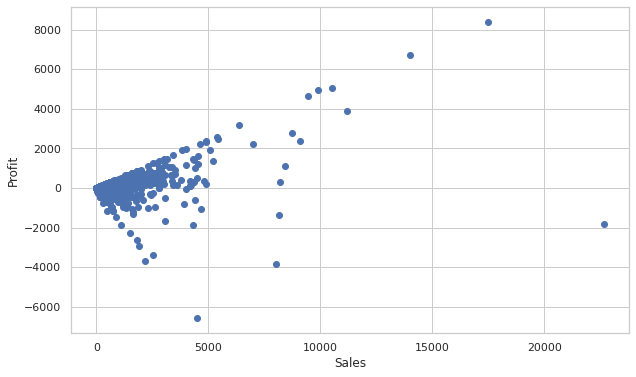

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(data["Sales"] , data["Profit"], c='b')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

The graphs above show how sales and profit are related; as can be seen, some sales have a negative profit ratio. Another example is that high sales suggest greater profit, so we feel there is no link between the two. High sales don't usually mean high profits, and low sales don't always mean low profits.

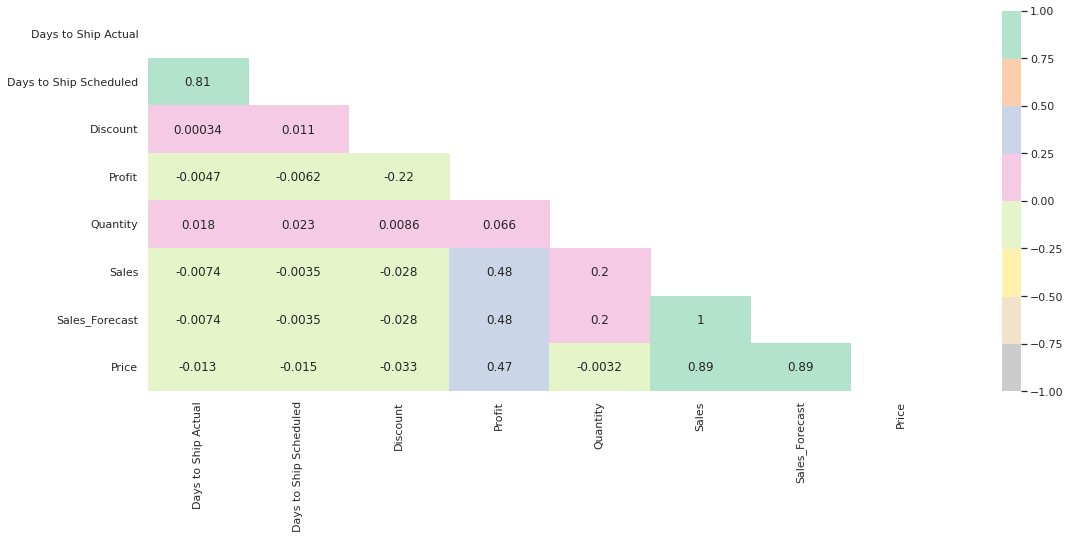

In [ ]:
plt.figure(figsize=(18, 7))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Pastel2_r')

In [ ]:
import plotly.graph_objects as go

In [ ]:
state_code = {'Alabama': 'Alabama','Alaska': 'Alaska','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])

In [ ]:
state_data = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'gnbu',
    colorbar_title = 'Sales in USD',))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,)

fig.show()

The company has the largest sales in California, with approximately $450K in sales. New York is the state with the second greatest sales. 

Texas (bottom left, orange) and Washington (top left, orange) are third and fourth on the top sales rankings, respectively, with $170K and 140K in sales. 

When we look at the total data, we can see that the store operates mostly on the East and West Coast regions. In fact, New York's total sales exceed those of all of Central America combined. 

In [ ]:
# feature engineering price_to_sales ratio
state_data['profit_to_sales'] = state_data['Profit'] / state_data['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state_data['States'] = state_data.index
state_data['States'] = state_data.States.apply(lambda x: state_name[x])

# sorting the dataframe
state_data = state_data.sort_values(by = ['profit_to_sales'], ascending=True)

In [ ]:
import plotly.express as px

fig = px.bar(state_data, x = 'profit_to_sales', y = 'States', title = 'PRICE TO SALES RATIO',
            color = 'Profit', color_continuous_scale=px.colors.sequential.Bluyl)
fig.update_layout(
    autosize=False,
    height=1000,
    xaxis = dict(
        tickmode = 'array',
        ticktext = state_data.States,
        title='Profit to Sales Ratio',
    ),
    yaxis=dict(title='State'),
)
fig.show()

Sales and profit are highest in major cities like New York, Los Angeles, Seattle, and San Francisco.

In terms of sales and profit, Technology consistently outperforms all other categories.

In some cities, the corporation offers substantial discounts, but sales and earnings are significantly lower.

There are cities with '0' total discounts but high profits.

The Standard ship option is preferred by the majority of businesses and customers.

There are some cities where revenues and sales are extremely low, and the corporation is even losing money.

The aforementioned information is simply a sample of the major issues on which the company should concentrate its efforts in order to enhance its operations and cut losses.